## Task: Predict the outcome of a football match, based on historical match and player data.

You are provided with football matches dataset. This dataset includes historical match outcomes, player statistics, and other relevant factors. Your objective is to develop a multiclass classification model that accurately predicts the result of a football match: "home win", "away win", or "draw".

Your target is the column: "Score".

You are provided with the code to download and load the csv file.

Your work will be evaluated based on the completion of the following tasks:

Tasks:
> *  EDA & Preprocessing: You should check the following points and ADD COMMENTS about your findings:
>   
>    1- Imbalance.
>    
>    2- Missing values.
>    
>    3- Duplicates.
>    
>    4- Categorical values.
> * Baseline: Create a majority class baseline.
> * Build a ML model: Train and evaluate using K-Fold (K=5) without shuffling, and with F1 Score as the metric.
> * Plot the features importance of your model.
> * Performance: Achieve F1 Score ≥ 0.5
> * (Bonus): Use "VotingClassifier" from sklearn with parameter voting="soft" to combine more than one model together then print the score (Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

Note: You are allowed to use any models or libraries you want.

In [2]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

%matplotlib inline

url = 'https://drive.google.com/file/d/15R3R4O7CJdtnV8AhIDLYvtNoRtROf6dk/view?usp=sharing'

file_id = url.split('/')[-2]

download_url = f'https://drive.google.com/uc?id={file_id}'

output = 'downloaded_file.csv'
gdown.download(download_url, output, quiet=False)

df = pd.read_csv('downloaded_file.csv')
#Reading the data:

df.head()

Downloading...
From: https://drive.google.com/uc?id=15R3R4O7CJdtnV8AhIDLYvtNoRtROf6dk
To: /content/downloaded_file.csv
100%|██████████| 122k/122k [00:00<00:00, 26.5MB/s]


,Season,Home Team,Away Team,Score,Month,Year,WeekOfYear,TotalShotsPerHomeTeam,TotalSoTPerHomeTeam,TotalPassesPerHomeTeam,...,AccurPerHalf1Away,AccurPerHalf2Away,InaccurPerHalf1Away,InaccurPerHalf2Away,AccurPassesPerHalf1Away,AccurPassesPerHalf2Away,ShotsHalf1_diff,ShotsHalf2_diff,SoTHalf1_diff,SoTHalf2_diff
0,1,Antennae,Andromeda,Away win,2,2017,46,8.0,2.0,340.0,...,271.0,162.0,43.0,32.0,0.8633,0.8350,1.0,2.0,0.0,1.0
1,1,Andromeda,Antennae,Draw,9,2016,258,5.0,1.0,443.0,...,174.0,212.0,31.0,45.0,0.8486,0.8247,0.0,-5.0,0.0,1.0
2,1,Andromeda,Butterfly,Away win,12,2016,347,3.0,0.0,669.0,...,185.0,94.0,60.0,49.0,0.7550,0.6570,0.0,-3.0,-1.0,-1.0
3,1,Andromeda,Cigar,Away win,1,2017,25,5.0,2.0,384.0,...,174.0,179.0,46.0,47.0,0.7910,0.7920,-2.0,-4.0,-1.0,0.0
4,1,Andromeda,Circinus,Home Win,8,2016,237,13.0,2.0,542.0,...,237.0,215.0,55.0,59.0,0.8115,0.7847,4.0,4.0,0.0,2.0


In [3]:
#getting the information about data such as data types and so on:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Season                   412 non-null    int64  
 1   Home Team                412 non-null    object 
 2   Away Team                412 non-null    object 
 3   Score                    412 non-null    object 
 4   Month                    412 non-null    int64  
 5   Year                     412 non-null    int64  
 6   WeekOfYear               412 non-null    int64  
 7   TotalShotsPerHomeTeam    412 non-null    float64
 8   TotalSoTPerHomeTeam      412 non-null    float64
 9   TotalPassesPerHomeTeam   412 non-null    float64
 10  TotalAccurPerHomeTeam    412 non-null    float64
 11  TotalInaccurPerHomeTeam  412 non-null    float64
 12  TotalShotsPerAwayTeam    412 non-null    float64
 13  TotalSoTPerAwayTeam      412 non-null    float64
 14  TotalPassesPerAwayTeam   4

Target Distribution:
Score
Home Win    164
Draw        135
Away win    113
Name: count, dtype: int64

Target Distribution Normalized:
Score
Home Win    0.398058
Draw        0.327670
Away win    0.274272
Name: proportion, dtype: float64


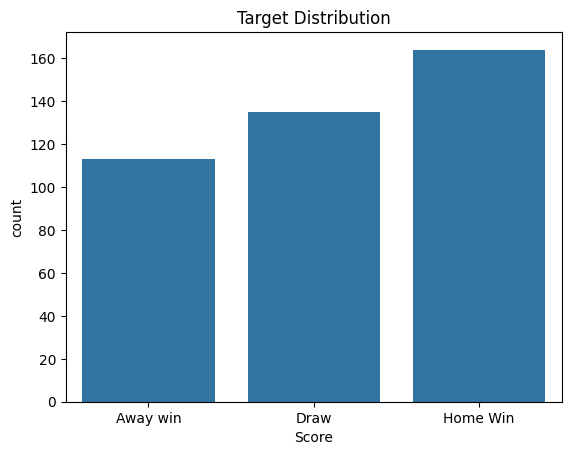

In [4]:
#exploratory data analysis and pre-processing:
#1.checkiing if the target 'score' is imbalanced or no:
print("Target Distribution:")
distribution = df["Score"].value_counts()
print(distribution)

print("\nTarget Distribution Normalized:")
distribution_normalized = df["Score"].value_counts(normalize=True)
print(distribution_normalized)

sns.countplot(x=df["Score"])
plt.title("Target Distribution")
plt.show()

The plot above shows that the classes are imbalanced so need to use the F1 score metric.

In [5]:
#2. checking for missing values:
display(df.isnull().sum())

assert df.isnull().sum().all() == 0

,0
Season,0
Home Team,0
Away Team,0
Score,0
Month,0
Year,0
WeekOfYear,0
TotalShotsPerHomeTeam,0
TotalSoTPerHomeTeam,0
TotalPassesPerHomeTeam,0


There are no missing values as shown by above output.

In [6]:
#3. checking for duplicates:
duplicates = df.duplicated().sum()
print(f"Number of Duplicate Samples: {duplicates}")
if duplicates > 0:
    print("Dropping Duplicates...")
    df.drop_duplicates(inplace=True)
    print("Duplicates Dropped.")
else:
    print("No Duplicate Samples Found.")

Number of Duplicate Samples: 0
No Duplicate Samples Found.


No duplicates found in the dataset.

In [7]:
#4.Looking for categorical values:
categorical_cols = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:", list(categorical_cols))

Categorical Columns: ['Home Team', 'Away Team', 'Score']


There are three categorical values found in dataset so we need to encode them using a label encoder.

In [8]:
#since there are a few categorical columns, so need to encode them using label encoder:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=["object"]).columns
le = LabelEncoder()

for col in categorical_cols:
    print(f"Encoding column: {col}")
    df[col] = le.fit_transform(df[col])

df

Encoding column: Home Team
Encoding column: Away Team
Encoding column: Score


,Season,Home Team,Away Team,Score,Month,Year,WeekOfYear,TotalShotsPerHomeTeam,TotalSoTPerHomeTeam,TotalPassesPerHomeTeam,...,AccurPerHalf1Away,AccurPerHalf2Away,InaccurPerHalf1Away,InaccurPerHalf2Away,AccurPassesPerHalf1Away,AccurPassesPerHalf2Away,ShotsHalf1_diff,ShotsHalf2_diff,SoTHalf1_diff,SoTHalf2_diff
0,1,1,0,0,2,2017,46,8.0,2.0,340.0,...,271.0,162.0,43.0,32.0,0.8633,0.8350,1.0,2.0,0.0,1.0
1,1,0,1,1,9,2016,258,5.0,1.0,443.0,...,174.0,212.0,31.0,45.0,0.8486,0.8247,0.0,-5.0,0.0,1.0
2,1,0,3,0,12,2016,347,3.0,0.0,669.0,...,185.0,94.0,60.0,49.0,0.7550,0.6570,0.0,-3.0,-1.0,-1.0
3,1,0,5,0,1,2017,25,5.0,2.0,384.0,...,174.0,179.0,46.0,47.0,0.7910,0.7920,-2.0,-4.0,-1.0,0.0
4,1,0,6,2,8,2016,237,13.0,2.0,542.0,...,237.0,215.0,55.0,59.0,0.8115,0.7847,4.0,4.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,1,14,12,0,8,2016,241,4.0,0.0,556.0,...,190.0,157.0,40.0,47.0,0.8260,0.7695,-4.0,-2.0,-1.0,-2.0
408,1,12,14,2,2,2017,50,15.0,5.0,503.0,...,208.0,130.0,36.0,36.0,0.8525,0.7830,4.0,2.0,2.0,2.0
409,1,12,15,2,10,2016,297,14.0,4.0,437.0,...,115.0,148.0,41.0,42.0,0.7373,0.7790,1.0,1.0,1.0,1.0
410,1,13,14,1,8,2017,228,14.0,5.0,561.0,...,186.0,149.0,31.0,37.0,0.8570,0.8013,6.0,2.0,1.0,0.0


In [9]:
#checking for different scales and scaling data:
df.describe()


,Season,Home Team,Away Team,Score,Month,Year,WeekOfYear,TotalShotsPerHomeTeam,TotalSoTPerHomeTeam,TotalPassesPerHomeTeam,...,AccurPerHalf1Away,AccurPerHalf2Away,InaccurPerHalf1Away,InaccurPerHalf2Away,AccurPassesPerHalf1Away,AccurPassesPerHalf2Away,ShotsHalf1_diff,ShotsHalf2_diff,SoTHalf1_diff,SoTHalf2_diff
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,...,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,1.497573,8.269417,8.354369,1.123786,6.087379,2017.118932,169.815534,10.876214,2.890777,465.813107,...,187.580097,173.533981,42.429612,44.703883,0.805866,0.782067,0.720874,0.128641,0.131068,0.009709
std,0.500602,5.054712,5.084747,0.811545,3.892364,0.778626,119.949523,4.445038,1.812423,105.932203,...,56.013475,56.364657,7.647171,8.593252,0.053117,0.065867,3.746499,4.637775,1.697947,1.954445
min,1.000000,0.000000,0.000000,0.000000,1.000000,2016.000000,2.000000,0.000000,0.000000,228.000000,...,81.000000,55.000000,25.000000,24.000000,0.627000,0.565400,-12.000000,-15.000000,-6.000000,-7.000000
25%,1.000000,4.000000,4.000000,0.000000,2.000000,2016.750000,50.750000,8.000000,2.000000,390.500000,...,147.000000,131.000000,37.000000,39.000000,0.767900,0.740525,-2.000000,-3.000000,-1.000000,-1.000000
50%,1.000000,8.000000,8.000000,1.000000,6.000000,2017.000000,153.000000,11.000000,3.000000,459.000000,...,180.000000,171.000000,41.000000,44.000000,0.812000,0.794700,1.000000,0.000000,0.000000,0.000000
75%,2.000000,12.000000,12.000000,2.000000,10.000000,2018.000000,275.250000,14.000000,4.000000,528.000000,...,222.000000,212.250000,47.000000,50.000000,0.842475,0.832125,3.000000,3.000000,1.000000,1.000000
max,2.000000,18.000000,18.000000,2.000000,12.000000,2018.000000,357.000000,32.000000,10.000000,896.000000,...,398.000000,348.000000,82.000000,84.000000,0.914000,0.900400,13.000000,15.000000,5.000000,7.000000


Good luck in the exam x)

Prepared by: Mohamed Eltayeb


In [10]:
#since scales are different so using minmax scaler algorithm to scale the data:
from sklearn.preprocessing import MinMaxScaler
features = df.columns.drop("Score")  #not scaling the target column
print("Features:", list(features))

scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df

Features: ['Season', 'Home Team', 'Away Team', 'Month', 'Year', 'WeekOfYear', 'TotalShotsPerHomeTeam', 'TotalSoTPerHomeTeam', 'TotalPassesPerHomeTeam', 'TotalAccurPerHomeTeam', 'TotalInaccurPerHomeTeam', 'TotalShotsPerAwayTeam', 'TotalSoTPerAwayTeam', 'TotalPassesPerAwayTeam', 'TotalAccurPerAwayTeam', 'TotalInaccurPerAwayTeam', 'ShotsHomeAway_diff', 'SoTHomeAway_diff', 'TotalShotsPerMatch', 'TotalSoTPerMatch', 'TotalPassesPerMatch', 'TotalAccurPerMatch', 'TotalInaccurPerMatch', 'AccurPassesHome', 'AccurPassesAway', 'AccurPassesMatch', 'ShotsPerHalf1Home', 'ShotsPerHalf2Home', 'SoTPerHalf1Home', 'SoTPerHalf2Home', 'PassesPerHalf1Home', 'PassesPerHalf2Home', 'AccurPerHalf1Home', 'AccurPerHalf2Home', 'InaccurPerHalf1Home', 'InaccurPerHalf2Home', 'AccurPassesPerHalf1Home', 'AccurPassesPerHalf2Home', 'ShotsPerHalf1Away', 'ShotsPerHalf2Away', 'SoTPerHalf1Away', 'SoTPerHalf2Away', 'PassesPerHalf1Away', 'PassesPerHalf2Away', 'AccurPerHalf1Away', 'AccurPerHalf2Away', 'InaccurPerHalf1Away', 'Ina

,Season,Home Team,Away Team,Score,Month,Year,WeekOfYear,TotalShotsPerHomeTeam,TotalSoTPerHomeTeam,TotalPassesPerHomeTeam,...,AccurPerHalf1Away,AccurPerHalf2Away,InaccurPerHalf1Away,InaccurPerHalf2Away,AccurPassesPerHalf1Away,AccurPassesPerHalf2Away,ShotsHalf1_diff,ShotsHalf2_diff,SoTHalf1_diff,SoTHalf2_diff
0,0.0,0.055556,0.000000,0,0.090909,0.5,0.123944,0.25000,0.2,0.167665,...,0.599369,0.365188,0.315789,0.133333,0.823345,0.804776,0.52,0.566667,0.545455,0.571429
1,0.0,0.000000,0.055556,1,0.727273,0.0,0.721127,0.15625,0.1,0.321856,...,0.293375,0.535836,0.105263,0.350000,0.772125,0.774030,0.48,0.333333,0.545455,0.571429
2,0.0,0.000000,0.166667,0,1.000000,0.0,0.971831,0.09375,0.0,0.660180,...,0.328076,0.133106,0.614035,0.416667,0.445993,0.273433,0.48,0.400000,0.454545,0.428571
3,0.0,0.000000,0.277778,0,0.000000,0.5,0.064789,0.15625,0.2,0.233533,...,0.293375,0.423208,0.368421,0.383333,0.571429,0.676418,0.40,0.366667,0.454545,0.500000
4,0.0,0.000000,0.333333,2,0.636364,0.0,0.661972,0.40625,0.2,0.470060,...,0.492114,0.546075,0.526316,0.583333,0.642857,0.654627,0.64,0.633333,0.545455,0.642857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,0.0,0.777778,0.666667,0,0.636364,0.0,0.673239,0.12500,0.0,0.491018,...,0.343849,0.348123,0.263158,0.383333,0.693380,0.609254,0.32,0.433333,0.454545,0.357143
408,0.0,0.666667,0.777778,2,0.090909,0.5,0.135211,0.46875,0.5,0.411677,...,0.400631,0.255973,0.192982,0.200000,0.785714,0.649552,0.64,0.566667,0.727273,0.642857
409,0.0,0.666667,0.833333,2,0.818182,0.0,0.830986,0.43750,0.4,0.312874,...,0.107256,0.317406,0.280702,0.300000,0.384321,0.637612,0.52,0.533333,0.636364,0.571429
410,0.0,0.722222,0.777778,1,0.636364,0.5,0.636620,0.43750,0.5,0.498503,...,0.331230,0.320819,0.105263,0.216667,0.801394,0.704179,0.72,0.566667,0.636364,0.500000


In [11]:
# Splitting data into X array containing features for training and y array with target variable:
X = df.drop("Score",axis=1)
y = df['Score']



In [14]:
#Creating a majority class baseline:
from sklearn.metrics import classification_report

# Set random seed
np.random.seed(42)

# Calculate the majority class baseline
baseline_pred = np.random.randint(0, 3, size=len(y))

# Evaluate the baseline
print(classification_report(y, baseline_pred, target_names=['Home Win', 'Draw', 'Away win']))

              precision    recall  f1-score   support

    Home Win       0.26      0.32      0.29       113
        Draw       0.28      0.27      0.28       135
    Away win       0.36      0.32      0.34       164

    accuracy                           0.30       412
   macro avg       0.30      0.30      0.30       412
weighted avg       0.31      0.30      0.30       412



In [17]:
#Training and evaluating using K-Fold (K=5) without shuffling, and a voting classifier.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#defining the models for classification:
model1=LogisticRegression(max_iter=1000)
model2=RandomForestClassifier(n_estimators=100)
model3=SVC(probability=True)
# Define a VotingClassifier with 'soft' voting
voting_clf = VotingClassifier(estimators=[('lr', model1), ('rf', model2), ('svc', model3)], voting='soft')

#  Stratified 5-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=False)
scores_f1 = []
for train_index, test_index in skf.split(X, y):
  # Split data into training and testing sets
  X_Train, X_Test = X.loc[train_index, :], X.loc[test_index, :]
  y_Train, y_Test = y.iloc[train_index], y.iloc[test_index]
  # Train the model
  voting_clf.fit(X_Train, y_Train)
  y_pred = voting_clf.predict(X_Test)
  scores_f1.append(f1_score(y_Test, y_pred, average='weighted'))
#print the mean f_1 score
print(f"Mean F1 Score: {np.mean(scores_f1)}")



Mean F1 Score: 0.5003349573065948


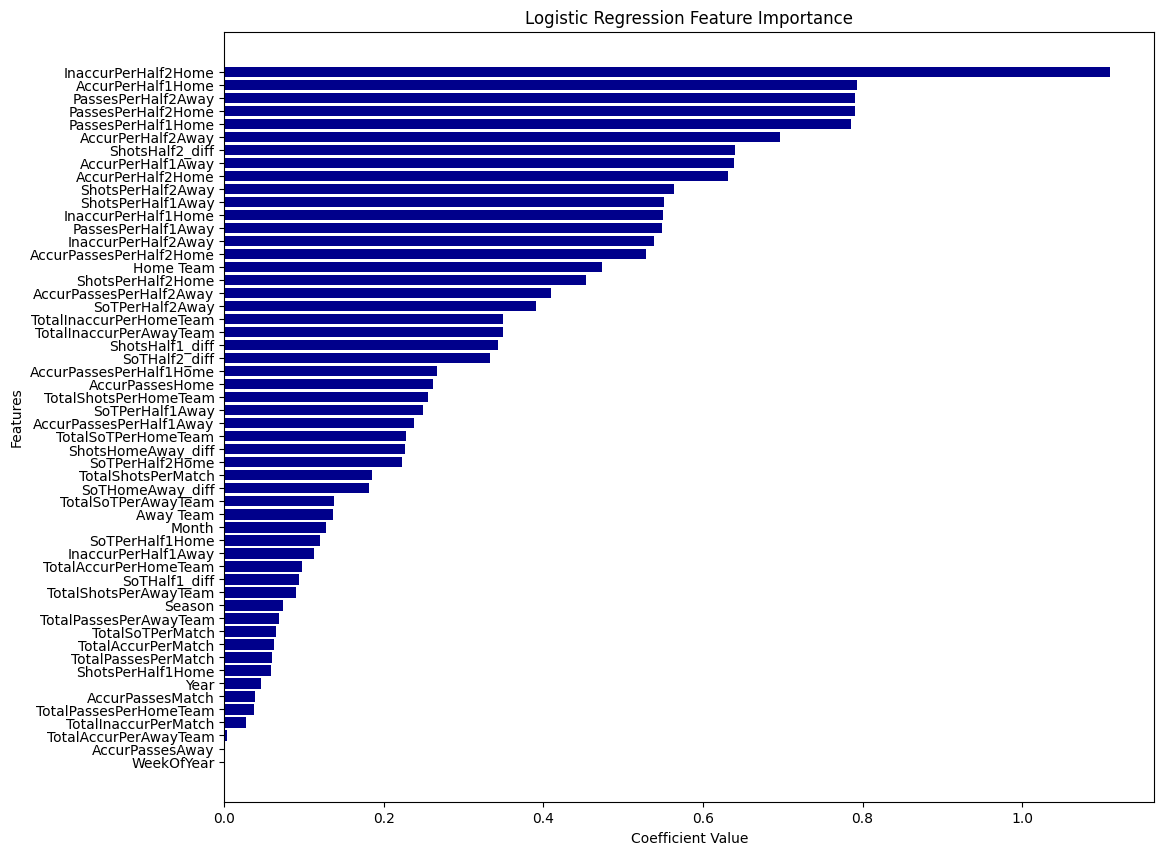

In [23]:
#plotting the feature importance:
# using model1 to get features importance and fitting it first
model1.fit(X, y)
# Retrieve Logistic Regression coefficients and sort by absolute importance
logistic_importance = list(zip(X.columns, model1.coef_[0]))
sorted_logistic_importance = sorted(logistic_importance, key=lambda x: abs(x[1]), reverse=True)

# Extract sorted features and their coefficients
features, coefficients = zip(*sorted_logistic_importance)

# Plot feature importances
plt.figure(figsize=(12, 10))
plt.barh(features, np.abs(coefficients), color='darkblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.show()
